In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [5]:
from tensorflow.keras.optimizers import Adam#RMSprop
from tensorflow.keras.activations import relu

In [6]:
df=pd.read_csv (r"C:\Users\nirma\Downloads\heart.csv")
df.duplicated().sum()

723

In [7]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [8]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.3,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [28]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)

In [34]:
model= Sequential([
Dense(128,activation='relu',input_shape=(3,)),
#Dense(128,activation='relu',input_shape=(x_train.shape[1],)),
Dense(64,activation='relu'),
Dense(32,activation='relu'),
Dense(1)])



In [51]:
model.compile(optimizer='Adam',loss= 'mean_squared_error',metrics=['mae'])

history=model.fit(x_train,y_train,epochs= 50,batch_size= 16,validation_data=(x_val,y_val),verbose=0)

In [52]:
y_pred = model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(f"mean squared error:{mse}")
print(f"mean absolute error:{mae}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
mean squared error:0.022022089160467443
mean absolute error:0.042280288433905674


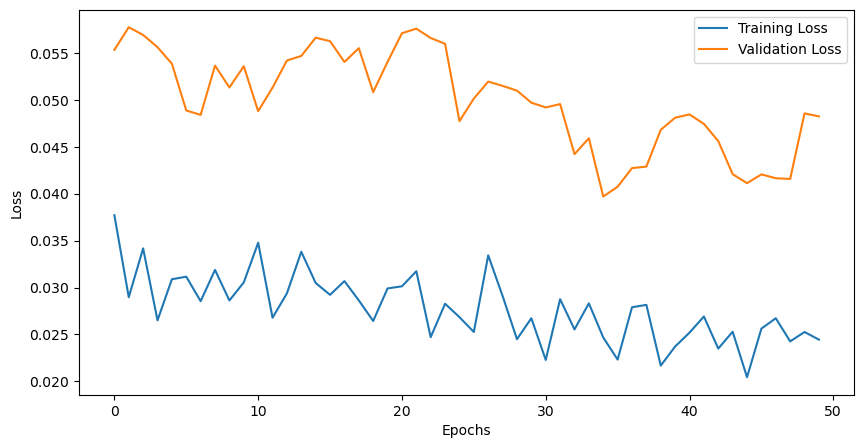

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
import numpy as np 
import pandas as pd

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [20]:
data=pd.read_csv(r"C:\Users\nirma\Downloads\heart.csv")
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [25]:
x=data.drop('target',axis=1)
y=data['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [26]:
scaler=StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [40]:
model = Sequential()
model.add(Dense(64,input_dim= x_train.shape[1],activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

c:\Users\nirma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs= 50,batch_size= 10,validation_data=(x_test,y_test))

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5938 - loss: 0.6647 - val_accuracy: 0.7987 - val_loss: 0.4763
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7211 - loss: 0.5456 - val_accuracy: 0.8117 - val_loss: 0.4214
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7879 - loss: 0.4359 - val_accuracy: 0.8182 - val_loss: 0.3889
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8085 - loss: 0.4168 - val_accuracy: 0.8182 - val_loss: 0.3758
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8048 - loss: 0.4226 - val_accuracy: 0.8182 - val_loss: 0.3727
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8484 - loss: 0.3764 - val_accuracy: 0.8182 - val_loss: 0.3690
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8293 - loss: 0.3755 - val_accuracy: 0.8052 - val_loss: 0.3632
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8593 - loss: 0.3602 - val_accuracy: 0.8312 - val_loss:

In [42]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,029 (35.27 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,020 (23.52 KB)

In [44]:
y_pred=(model.predict(x_test>0.5).astype("int32"))
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy:{accuracy*100:2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model Accuracy:43.506494%
